Leveraging the customer data collected by Aerofit consisting of the Gender, Age, Income, Weekly Usage, Fitness, Marital Status and Miles run on treadmill to identify characteristics which make the customer buy a particular treadmill out of KP281, KP481 and KP781 in the increasing order of expenditures. Further providing recommendations of treadmill for future orders/customers based on their profile.

In [31]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
!gdown 161u8UTzjInakN1I2w_D3tS4VSoYsRZqN

Downloading...
From: https://drive.google.com/uc?id=161u8UTzjInakN1I2w_D3tS4VSoYsRZqN
To: /content/aerofit_treadmill.txt
100% 7.28k/7.28k [00:00<00:00, 15.4MB/s]


In [33]:
df=pd.read_csv('aerofit_treadmill.txt')

In [34]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [35]:
# Checking basic info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [36]:
# Number of unique values in each column
for i in df.columns:
  print(i, ':', df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


From the above observation, we can conclude that only Inncome, Miles and Age can be considered as Continuous, the rest of the columns though integers/floats should be considered as categories.

In [37]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [38]:
# A broader look at correlation between the columns of dataframe

# Creating a copy of the dataframe -
df_copy=df.copy()

df_copy['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)

df_copy['MaritalStatus'].replace(['Single', 'Partnered'], [0, 1], inplace=True)

df_copy['Product'].replace(['KP281', 'KP481', 'KP781'], [0, 1, 2], inplace=True)

df_copy.corr()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
Product,1.000000,0.032225,0.230653,0.495018,-0.017602,0.537447,0.594883,0.624168,0.571596
Age,0.032225,1.000000,0.027544,0.280496,0.192152,0.015064,0.061105,0.513414,0.036618
Gender,0.230653,0.027544,1.000000,0.094089,-0.018836,0.214424,0.254609,0.202053,0.217869
Education,0.495018,0.280496,0.094089,1.000000,0.068569,0.395155,0.410581,0.625827,0.307284
MaritalStatus,-0.017602,0.192152,-0.018836,0.068569,1.000000,-0.007786,-0.050751,0.150293,0.025639
Usage,0.537447,0.015064,0.214424,0.395155,-0.007786,1.000000,0.668606,0.519537,0.759130
Fitness,0.594883,0.061105,0.254609,0.410581,-0.050751,0.668606,1.000000,0.535005,0.785702
Income,0.624168,0.513414,0.202053,0.625827,0.150293,0.519537,0.535005,1.000000,0.543473
Miles,0.571596,0.036618,0.217869,0.307284,0.025639,0.759130,0.785702,0.543473,1.000000


In [39]:
df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


there are no null values in our data

<Axes: xlabel='Product', ylabel='Income'>

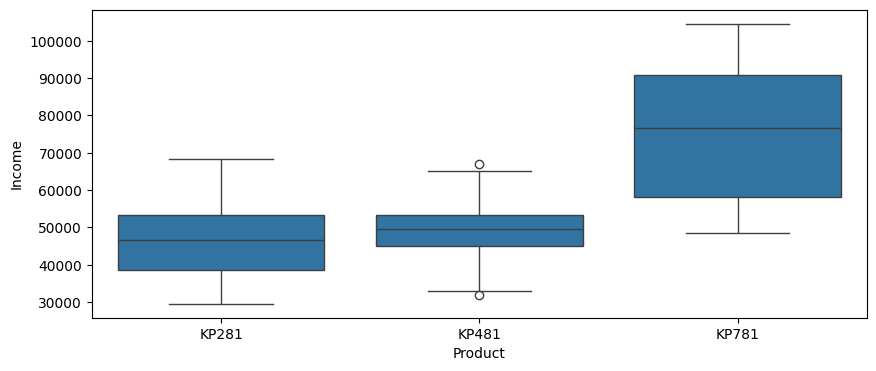

In [40]:
plt.figure(figsize=(10,4))

sns.boxplot(x=df['Product'],y=df['Income'])

Insight- Above boxplot shows that people with higher income(above 60k) seems to buy higher variant(KP781) and people with lesser income prefer variants KP281 and KP481

<ipython-input-41-33f72dc8f7ce>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_count=df.groupby('Age_Bucket')['Age_Bucket'].count().reset_index(name='Count').sort_values(by='Age_Bucket')


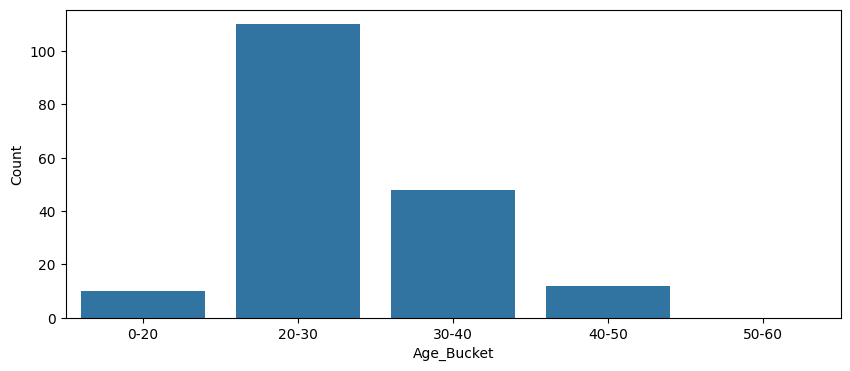

In [41]:
df['Age_Bucket'] = pd.cut(df['Age'], bins=[10,20, 30, 40, 50, 60], labels=['0-20','20-30', '30-40', '40-50', '50-60'])
age_count=df.groupby('Age_Bucket')['Age_Bucket'].count().reset_index(name='Count').sort_values(by='Age_Bucket')
plt.figure(figsize=(10,4))
sns.barplot(x=age_count['Age_Bucket'],y=age_count['Count'])
plt.show()

above graph shows that people between 20-30 seems to buy threadmill more than any other age range

<Axes: xlabel='Product', ylabel='count'>

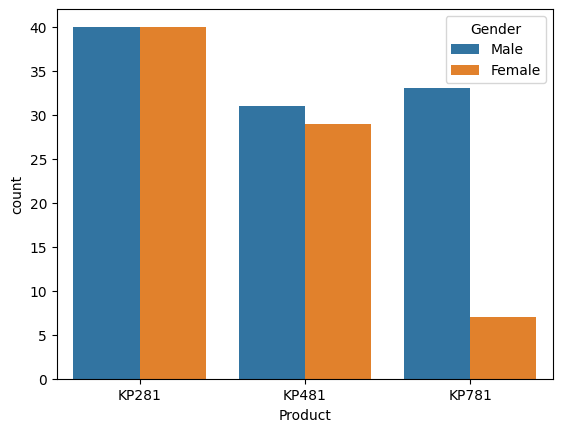

In [42]:
sns.countplot(x=df['Product'],hue=df['Gender'])

Above graph shows that more males prefer variant KP781

In [43]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bucket
0,KP281,18,Male,14,Single,3,4,29562,112,0-20
1,KP281,19,Male,15,Single,2,3,31836,75,0-20
2,KP281,19,Female,14,Partnered,4,3,30699,66,0-20
3,KP281,19,Male,12,Single,3,3,32973,85,0-20
4,KP281,20,Male,13,Partnered,4,2,35247,47,0-20


<Axes: xlabel='MaritalStatus', ylabel='count'>

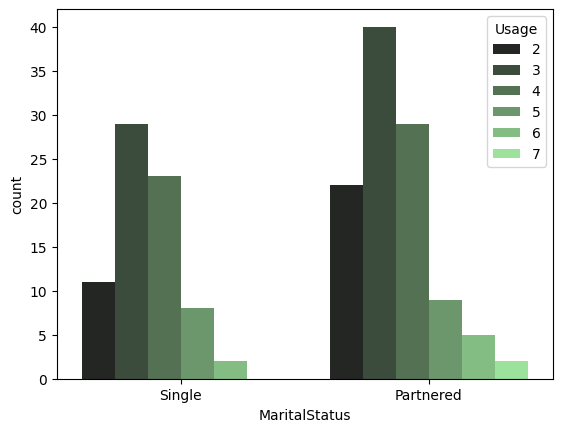

In [44]:
sns.countplot(x=df['MaritalStatus'],palette ='dark:lightgreen',hue=df['Usage'])

Person who are married seems to buy threadmills more than singles and also usage seems to increase(Some of the married persons excercise all 7days in a week)

<Axes: xlabel='Miles', ylabel='Income'>

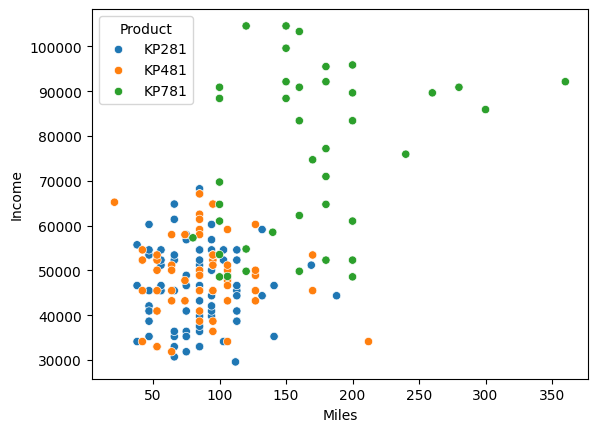

In [45]:
sns.scatterplot(x=df['Miles'],y=df['Income'],hue=df['Product'])

above scatterplot shows that people buying high variant uses the threadmill more(more miles)

<Axes: xlabel='Gender', ylabel='Income'>

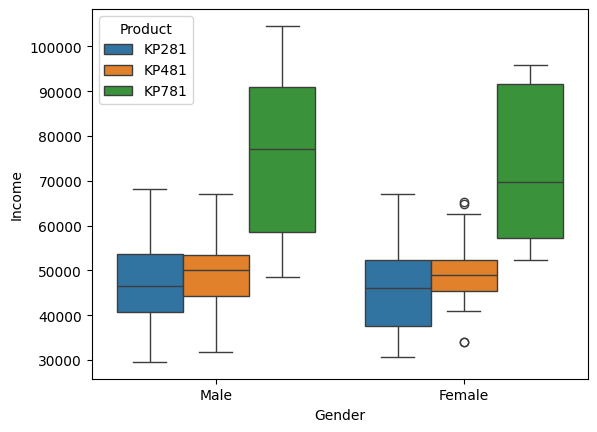

In [46]:
sns.boxplot(data=df,x='Gender',y='Income',hue='Product')

Above plot shows that people with higher income prefers high variant irrespective of gender


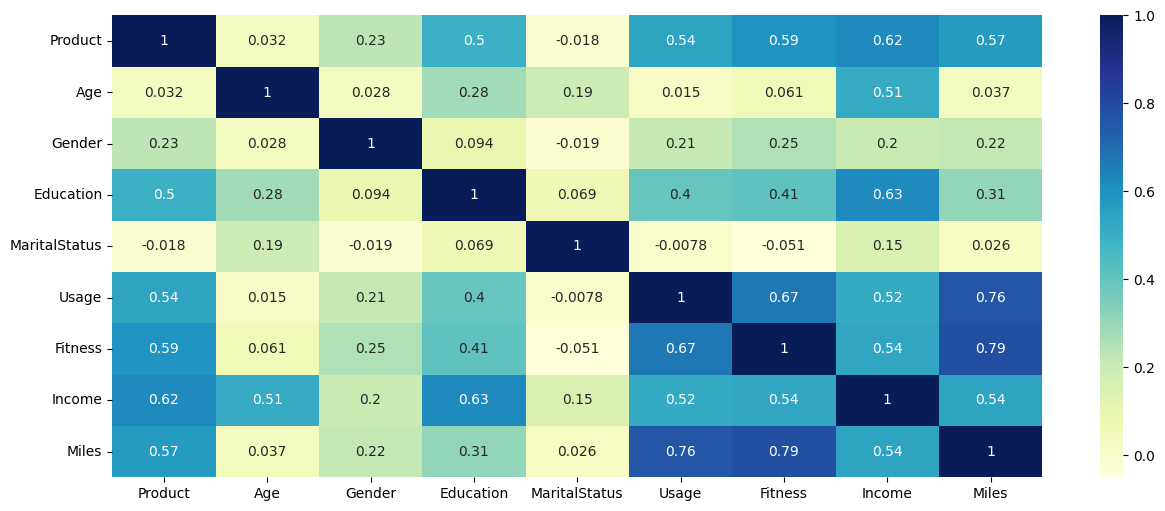

In [47]:
#Correlation plot using heatmap
plt.figure(figsize=(15,6))
sns.heatmap(df_copy.corr(), cmap="YlGnBu", annot=True)
plt.show()

above heatmap shows

1.The product/treadmill purchased highly correlates with Education, Income, Usage, Fitness and Miles

2.Age is highly correlated to Income (0.51) which definitely seems reasonable. It's also correlated with Education and Marital Status which stands completely alright.

3.Gender certainly has some correlation to Usage, Fitness, Income and Miles.

4.Education is correlated to Age and Miles. It's highly correlated to Income (as expected). It's sufficiently correlated to Usage and Fitness too.

5.Marital Status has some correlation to Income and Age (as expected).

6.Usage is extremely correlated to Fitness and Miles and has a higher correlation with Income as well.

7.Fitness has a great correlation with Income.


In [48]:
pd.crosstab(df['Gender'],df['Product'],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [49]:
round(pd.crosstab(df['Gender'],df['Product'],margins=True,normalize='index')*100,2)

Product,KP281,KP481,KP781
Gender,,,
Female,52.63,38.16,9.21
Male,38.46,29.81,31.73
All,44.44,33.33,22.22


Above table shows that nearly 45% of customers prefer basic variant while only 22% buys high variant

In [50]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_Bucket
0,KP281,18,Male,14,Single,3,4,29562,112,0-20
1,KP281,19,Male,15,Single,2,3,31836,75,0-20
2,KP281,19,Female,14,Partnered,4,3,30699,66,0-20
3,KP281,19,Male,12,Single,3,3,32973,85,0-20
4,KP281,20,Male,13,Partnered,4,2,35247,47,0-20


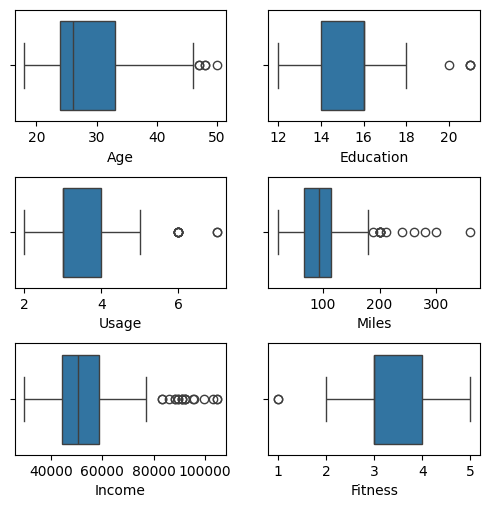

In [51]:
fig,axis=plt.subplots(figsize=(6,5),nrows=3,ncols=2)
plt.subplots_adjust(top=1.0,hspace=0.5)

sns.boxplot(data=df,x="Age",ax=axis[0,0])
sns.boxplot(data=df,x="Education",ax=axis[0,1])
sns.boxplot(data=df,x="Usage",ax=axis[1,0])
sns.boxplot(data=df,x="Miles",ax=axis[1,1])
sns.boxplot(data=df,x="Income",ax=axis[2,0])
sns.boxplot(data=df,x="Fitness",ax=axis[2,1])
plt.show()

from the above boxplot it is clear that Miles and Income has more outliers compared to other data

Below are the Recommendations based on data:
1.KP781 attracts people with higher income and most of them are men so recommend people with high income for KP781 variant
2.People with higher Education has more income so target high educated people to recommend high variant
3.Most bought variant is KP81 with 45% people buying it
4.Persons married bought treadmill more compared to singles and their usage is also seems high so advertise our product to married people more
5.People who use treadmill more often is more fit compared to people with less usage so encourage people to increase usage to be fit
6.People in age range between 20-30 buy treadmill more hence advertise to people in such age range